In [2]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

dimension reduction to define a smaller set of features that will produce the same predicted values for  𝑌  as our larger number of features

If this is sounding a lot like PCA, you're right. The difference is that instead of trying to reduce a set of  𝑋  into a smaller set  𝑅(𝑋)  that contains all the variance in  𝑋 , we are trying to reduce a set of  𝑋  into an  𝑅(𝑋)  that contains all the variance in  𝑋  that is shared with  𝑌 .

## Partial least squares regression
It first tries to find the vector within the  𝑛 -dimensional space of  𝑋  with the highest covariance with  𝑦 . 

Then it looks for a second vector, perpendicular to the first, that explains the highest covariance with  𝑦  that remains after accounting for the first vector. 

This continues for as many components as we permit, up to  𝑛 .

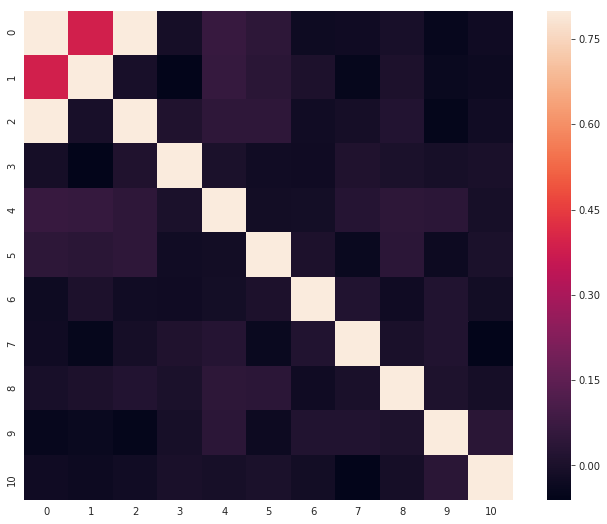

In [3]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8466967851394629
R-squared 3 component PLSR: 0.8350685281249567


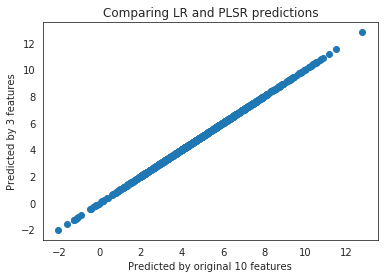

In [21]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls3 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls3.fit(X, y)

# Save predicted values.
Y_PLS_pred3 = pls3.predict(X)
print('R-squared 3 component PLSR:', pls3.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared regression: 0.8466967851394629
R-squared 3 component PLSR: 0.8466966072499593
R-squared 2 component PLSR: 0.8466221586075429


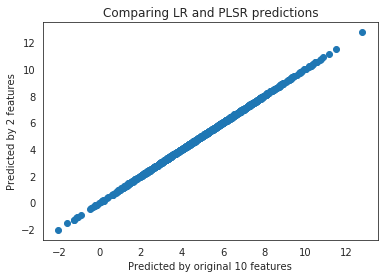

In [19]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 2 dimensions.
pls2 = PLSRegression(n_components=2)

# Reduce X to R(X) and regress on y.
pls2.fit(X, y)

print('R-squared regression:', regr.score(X, y))
print('R-squared 3 component PLSR:', pls3.score(X, y))
# Save predicted values.
Y_PLS_pred2 = pls2.predict(X)
print('R-squared 2 component PLSR:', pls2.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred2) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

Using PLSR to reduce the feature space to only 2 dimensions slightly lowers the predictability power of the model compared to when using 3 dimensions 

R-squared regression: 0.8466967851394629
R-squared 2 component PLSR: 0.8466221586075429
R-squared 3 component PLSR: 0.8350685281249567
R-squared 4 component PLSR: 0.8466967845311211


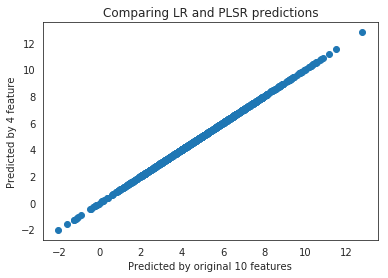

In [22]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 4 dimensions.
pls4 = PLSRegression(n_components=4)

# Reduce X to R(X) and regress on y.
pls4.fit(X, y)

print('R-squared regression:', regr.score(X, y))
print('R-squared 2 component PLSR:', pls2.score(X, y))
print('R-squared 3 component PLSR:', pls3.score(X, y))
# Save predicted values.
Y_PLS_pred4 = pls4.predict(X)
print('R-squared 4 component PLSR:', pls4.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred4) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 4 feature')
plt.title('Comparing LR and PLSR predictions')
plt.show()

Using PLSR to reduce the feature space to 4 dimensions does very little to increase the predicibility power of the model which used only 3 features.